## Nesse documento você vai encontrar o uso de diferentes APIs 
1. Awesome api
    - Busca da cotação de todas a moedas.
    - Pegando todas as cotações de Dólar para o ano de 2023 e criando um gráfico para visualizar seu desempenho.
2. API da Alpha Vantage 
    - Busca de todas as cotações das ações do Itaú 'ITUB3'.
    - Criar uma tabela com os dados de 3 ações Itaú 'ITUB3', Ambev 'ABEV3', Banco do Brasil 'BBAS3'.
    - Buscar todas as ações da Amazon.
    - Buscando dados trimestrais e anuais para as ações da Amazon.
3. API do Banco Central
    - Tabela com o cálculo do Ticket Médio do Pix por estado para pessoas físicas e jurídicas do ano de 2023.

### Observações 
- Os dados geralmente serão requisitados no formato JSON ou CSV, após isso será utilizada a biblioteca do Pandas para trasformar essas informaçoes em um Dataframe e a partir desse DataFrame podemos realizar diversar análises e contas. Achar o maior valor, o menor valor, a média, pode ser feita uma média móvel, achar o Ticket médio, e qualquer outra métrica importante.

In [1]:
import pandas as pd
import requests 
import json
import matplotlib.pyplot as plt 
from io import StringIO
import pprint

### Pegando as cotações de todas as moedas

- Vamos pegar o valor de todas as moedas disponíveis no database da Awesomeapi
- usando o parâmetro bid que segundo nossa api é o preço de compra 

In [2]:
cotacoes = requests.get(' https://economia.awesomeapi.com.br/json/all')
cotacoes_dicionario = cotacoes.json()
cotacoes_df = pd.DataFrame(cotacoes_dicionario).T[['bid']]
print(cotacoes_df)

          bid
USD    4.9567
USDT     4.83
CAD    3.6899
GBP    6.1696
ARS    0.0206
BTC    136376
LTC    478.88
EUR    5.3043
JPY   0.03541
CHF    5.4507
AUD    3.2724
CNY    0.6998
ILS    1.3231
ETH   9527.92
XRP       2.7
DOGE  0.36342


# Pegando a cotação do Dólar para o ano de 2023 
- E vendo seu preço por dia 

In [3]:
cotacao_dolar_2023 = requests.get('https://economia.awesomeapi.com.br/json/daily/USD-BRL/133?start_date=20230101&end_date=20230530')
cotacao_dolar_2023_dic = cotacao_dolar_2023.json()
lista_cotacao_dolar_2023 =  [float(item['bid'])for item in cotacao_dolar_2023_dic]
lista_cotacao_dolar_2023.reverse() # a lista vem do último dia para o primeiro como padrão 
df_cotacao_dolar_2023 = pd.DataFrame({'cotacao_dolar_2023': lista_cotacao_dolar_2023})
print(df_cotacao_dolar_2023)
print('O maior valor do Dólar em 2023 foi equivalente a R${:.2f} no {}º dia do ano'.format(df_cotacao_dolar_2023['cotacao_dolar_2023'].max(),df_cotacao_dolar_2023['cotacao_dolar_2023'].idxmax()))
print('O menor Valor do Dólar em 2023 foi equivalente a R${:.2f} no {}º dia do ano'.format(df_cotacao_dolar_2023['cotacao_dolar_2023'].min(),df_cotacao_dolar_2023['cotacao_dolar_2023'].idxmin()))

     cotacao_dolar_2023
0                5.3633
1                5.4797
2                5.4312
3                5.3509
4                5.2217
..                  ...
128              5.0362
129              4.9936
130              4.9935
131              5.0191
132              5.0357

[133 rows x 1 columns]
O maior valor do Dólar em 2023 foi equivalente a R$5.48 no 1º dia do ano
O menor Valor do Dólar em 2023 foi equivalente a R$4.89 no 118º dia do ano


- Criando um gráfico para a visualização do preço ao longo do ano

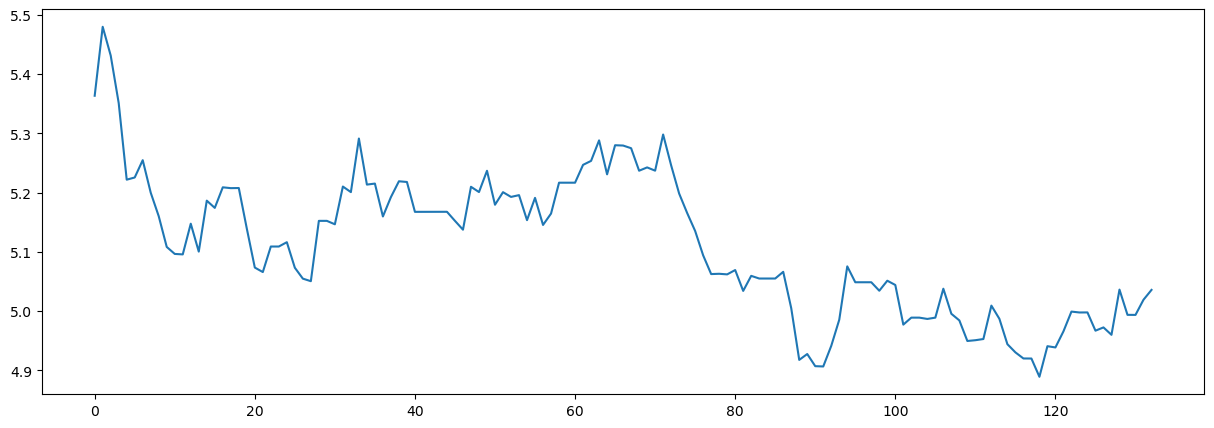

In [4]:
plt.figure(figsize=(15,5))
plt.plot(lista_cotacao_dolar_2023)

## Usando a API da Alpha Vantage para preços de ações 
 

In [5]:
from chave import api_key # importando nossa chave para usar a API da Aplha Vantage 

In [10]:
url = 'https://www.alphavantage.co/query?function=TIME_SERIES_WEEKLY_ADJUSTED&symbol=ITUB3.SAO&apikey={}&datatype=csv'.format(api_key)
r = requests.get(url)

tabela_itau = pd.read_csv(StringIO(r.text))
display(tabela_itau)
print('Na data de {} as ações do ITUB3 bateram seu maior valor, de R${:.2f}'.format(tabela_itau.loc[tabela_itau['adjusted close'].idxmax(), 'timestamp'], tabela_itau['adjusted close'].max()))
print('Na data de {} as ações do ITUB3 bateram seu menor valor, de R${:.2f}'.format(tabela_itau.loc[tabela_itau['adjusted close'].idxmin(), 'timestamp'], tabela_itau['adjusted close'].min()))


,timestamp,open,high,low,close,adjusted close,volume,dividend amount
0,2023-06-02,22.85,23.05,22.34,22.89,22.8900,2609200,0.0176
1,2023-05-26,22.71,23.48,22.30,22.94,22.9221,2436900,0.0000
2,2023-05-19,22.96,23.33,22.61,22.73,22.7123,2503300,0.0000
3,2023-05-12,22.00,23.22,20.91,22.96,22.9421,6325500,0.0000
4,2023-04-29,21.59,22.10,21.25,22.09,22.0728,4396700,0.0176
...,...,...,...,...,...,...,...,...
960,2005-02-10,350.00,350.00,350.00,350.00,2.2894,0,0.0000
961,2005-02-02,330.00,340.00,330.00,340.00,2.2240,1,0.0000
962,2005-01-28,345.00,345.00,334.00,334.00,2.1848,1,0.0000
963,2005-01-21,344.00,345.00,340.00,340.00,2.2240,0,0.0000


Na data de 2020-01-03 as ações do ITUB3 bateram seu maior valor, de R$25.60
Na data de 2005-01-28 as ações do ITUB3 bateram seu menor valor, de R$2.18


## Pegando mais de uma ação
- E Criando uma tabela 

In [7]:
acoes = ['ITUB3', 'ABEV3', 'BBAS3'] # ações do Itaú, Ambev e BB
compilada = pd.DataFrame()

for acao in acoes:
    url = f'https://www.alphavantage.co/query?function=GLOBAL_QUOTE&symbol={acao}.SAO&apikey={api_key}'
    r = requests.get(url)
    data = r.json()
    if 'Global Quote' in data:
        tabela = pd.DataFrame([data['Global Quote']])
        compilada = pd.concat([compilada,tabela])
display(compilada)

,01. symbol,02. open,03. high,04. low,05. price,06. volume,07. latest trading day,08. previous close,09. change,10. change percent
0,ITUB3.SAO,22.6100,23.0500,22.5900,22.8900,574800,2023-06-02,22.5900,0.3000,1.3280%
0,ABEV3.SAO,14.4000,14.6200,14.2500,14.4600,26641200,2023-06-02,14.2400,0.2200,1.5449%
0,BBAS3.SAO,44.7400,44.7400,44.7400,44.7400,10458200,2023-06-02,44.7400,0.0000,0.0000%


## Encontrando ativos
- vamos buscar as ações da Amazon por exemplo 

In [8]:
url ='https://www.alphavantage.co/query?function=SYMBOL_SEARCH&keywords=amazon&apikey={}&datatype=csv'.format(api_key)
r = requests.get(url)

tabela_itau = pd.read_csv(StringIO(r.text))
display(tabela_itau)


,symbol,name,type,region,marketOpen,marketClose,timezone,currency,matchScore
0,AMZN,Amazon.com Inc,Equity,United States,09:30,16:00,UTC-04,USD,0.8000
1,AMZ.DEX,Amazon.com Inc,Equity,XETRA,08:00,20:00,UTC+02,EUR,0.6000
2,AMZ.FRK,Amazon.com Inc,Equity,Frankfurt,08:00,20:00,UTC+02,EUR,0.6000
3,AMZO34.SAO,Amazon.com Inc,Equity,Brazil/Sao Paolo,10:00,17:30,UTC-03,BRL,0.6000
4,0R1O.LON,Amazon.com Inc.,Equity,United Kingdom,08:00,16:30,UTC+01,USD,0.5714
5,AMZ1.FRK,AMAZON.COM INC.CDR DL-01,Equity,Frankfurt,08:00,20:00,UTC+02,EUR,0.5000
6,AZFL,Amazonas Florestal Ltd,Equity,United States,09:30,16:00,UTC-04,USD,0.4286


- Buscando os resultados da amazon, anual e trimestral

In [11]:
url = 'https://www.alphavantage.co/query?function=EARNINGS&symbol=AMZN&apikey={}'.format(api_key)
r = requests.get(url)
data = r.json()
#pprint.pprint(data) # linha usada para a visualização dos itens do dicionário 
resultado_anual = pd.DataFrame(data['annualEarnings'])
resultado_trimestral = pd.DataFrame(data['quarterlyEarnings'])

display(resultado_anual)
display(resultado_trimestral)

,fiscalDateEnding,reportedEPS
0,2023-03-31,0.31
1,2022-12-31,0.97
2,2021-12-31,2.15
3,2020-12-31,2.09
4,2019-12-31,1.14
5,2018-12-31,1
6,2017-12-31,0.23
7,2016-12-31,0.25
8,2015-12-31,0.06
9,2014-12-31,-0.03


,fiscalDateEnding,reportedDate,reportedEPS,estimatedEPS,surprise,surprisePercentage
0,2023-03-31,2023-04-27,0.31,0.21,0.1,47.619
1,2022-12-31,2023-02-02,0.25,0.18,0.07,38.8889
2,2022-09-30,2022-10-27,0.17,0.22,-0.05,-22.7273
3,2022-06-30,2022-07-28,0.18,0.14,0.04,28.5714
4,2022-03-31,2022-04-28,0.37,0.42,-0.05,-11.9048
...,...,...,...,...,...,...
99,1998-06-30,1998-07-22,-0.07,-0.07,0,0
100,1998-03-31,1998-04-27,-0.03,-0.04,0.01,25
101,1997-12-31,1998-01-22,-0.03,-0.04,0.01,25
102,1997-09-30,1997-10-27,-0.03,-0.03,0,0


### Usando uma das APIs do banco central
- API de Estatísticas do pix 
- https://dadosabertos.bcb.gov.br/dataset?res_format=API
    1. https://olinda.bcb.gov.br/olinda/servico/Pix_DadosAbertos/versao/v1/aplicacao#!/recursos/TransacoesPixPorMunicipio#eyJmb3JtdWxhcmlvIjp7IiRmb3JtYXQiOiJqc29uIiwiJHRvcCI6MTAwMCwiRGF0YUJhc2UiOiIyMDIzMDEifSwicHJvcHJpZWRhZGVzIjpbNCw3LDgsOSwxMF0sInBlc3F1aXNhZG8iOnRydWUsImFjdGl2ZVRhYiI6InRhYmxlIiwiZ3JpZFN0YXRlIjp7AzADOlt7A0IDIgQ0BCIsA0EDfSx7A0IDIgQ3BCIsA0EDfSx7A0IDIgQ4BCIsA0EDfSx7A0IDIgQ5BCIsA0EDfSx7A0IDIgQxMAQiLANBA31dLAMxAzp7fSwDMgM6W10sAzMDOnt9LAM0Azp7fSwDNQM6e319LCJwaXZvdE9wdGlvbnMiOnsDYQM6e30sA2IDOltdLANjAzo1MDAsA2QDOltdLANlAzpbXSwDZgM6W10sA2cDOiJrZXlfYV90b196IiwDaAM6ImtleV9hX3RvX3oiLANpAzp7fSwDagM6e30sA2sDOjg1LANsAzpmYWxzZSwDbQM6e30sA24DOnt9LANvAzoiQ29udGFnZW0iLANwAzoiVGFibGUifX0=

### Será calclulado o Ticket Médio do Pix por estado para pessoas Físicas e pessoas Jurídicas
- Iremos requisitar apenas 100.000 dados referentes ao ano de 2023 
- Caso fosse necessária uma análise detalhada, com todos os dados poderiamos usar o código abaixo que percorreria todas as informações disponíveis na API 
    

In [ ]:
tabela_final = pd.DataFrame()
skip = 0 #criando uma variável para pularmos as informações já requisitadas
while True :
    link = f"https://olinda.bcb.gov.br/olinda/servico/Pix_DadosAbertos/versao/v1/odata/TransacoesPixPorMunicipio(DataBase=@DataBase)?@DataBase='202301'&$top=100000&$skip{skip}&$format=json&$select=Estado,VL_PagadorPF,QT_PagadorPF,VL_PagadorPJ,QT_PagadorPJ"
    requisicao = requests.get(link)
    dados_pix = requisicao.json()
    tabela_pix = pd.DataFrame(dados_pix['value'])
    if len(dados_pix['value']) <1:
        break
    tabela_final = pd.concat([tabela_final,tabela_pix])
    skip += 100000

In [12]:
link ="https://olinda.bcb.gov.br/olinda/servico/Pix_DadosAbertos/versao/v1/odata/TransacoesPixPorMunicipio(DataBase=@DataBase)?@DataBase='202301'&$top=100000&$format=json&$select=Estado,VL_PagadorPF,QT_PagadorPF,VL_PagadorPJ,QT_PagadorPJ"
# link dispolibilizado pelo sandbox da API
requisicao = requests.get(link)
dados_pix = requisicao.json()
#pprint.pprint(dados_pix) linha usada para a visualização dos itens do dicionário 
tabela_pix = pd.DataFrame(dados_pix['value'])# criando uma tabela com todos nossos dados 
df_tabela_pix = pd.DataFrame()
df_tabela_pix = tabela_pix.groupby('Estado').sum().reset_index() # agrupando por estado e calculando a soma para cada parâmetro 
print(df_tabela_pix) # como essa tabela será usada para cálculos os valores não seram formatados 

                 Estado  VL_PagadorPF  QT_PagadorPF  VL_PagadorPJ  \
0                  ACRE  7.952729e+09      46502641  3.973124e+09   
1               ALAGOAS  3.029850e+10     161422601  1.420507e+10   
2                 AMAPÁ  8.771923e+09      61870484  3.734811e+09   
3              AMAZONAS  3.971392e+10     294932814  3.614575e+10   
4                 BAHIA  1.524145e+11     847405351  7.328775e+10   
5                 CEARÁ  8.972936e+10     518168686  5.209980e+10   
6      DISTRITO FEDERAL  5.669777e+10     206036281  4.222184e+10   
7        ESPÍRITO SANTO  4.690192e+10     212506239  4.519905e+10   
8                 GOIÁS  1.208761e+11     412306045  8.969374e+10   
9              MARANHÃO  6.074182e+10     389929421  3.149352e+10   
10          MATO GROSSO  6.287891e+10     203428891  6.349365e+10   
11   MATO GROSSO DO SUL  3.993045e+10     151963101  3.638185e+10   
12         MINAS GERAIS  2.430200e+11     955411944  2.237494e+11   
13        NAO INFORMADO  2.823909e

In [13]:
# criando uma Tabela para o ticket médio por estado PF e PJ
df_tkm_pix = pd.DataFrame({
    'Estado': df_tabela_pix['Estado'],
    'Ticket Médio PF': df_tabela_pix['VL_PagadorPF'] / df_tabela_pix['QT_PagadorPF'],
    'Ticket Médio PJ': df_tabela_pix['VL_PagadorPJ'] / df_tabela_pix['QT_PagadorPJ']
})
df_tkm_pix['Ticket Médio PF'] = df_tkm_pix['Ticket Médio PF'].map('R${:,.2f}'.format)
df_tkm_pix['Ticket Médio PJ'] = df_tkm_pix['Ticket Médio PJ'].map('R${:,.2f}'.format)
display(df_tkm_pix)

,Estado,Ticket Médio PF,Ticket Médio PJ
0,ACRE,R$171.02,"R$1,434.31"
1,ALAGOAS,R$187.70,"R$1,693.75"
2,AMAPÁ,R$141.78,"R$1,227.56"
3,AMAZONAS,R$134.65,"R$2,312.51"
4,BAHIA,R$179.86,"R$1,612.46"
5,CEARÁ,R$173.17,"R$1,776.48"
6,DISTRITO FEDERAL,R$275.18,"R$2,005.40"
7,ESPÍRITO SANTO,R$220.71,"R$2,402.85"
8,GOIÁS,R$293.17,"R$2,170.35"
9,MARANHÃO,R$155.78,"R$1,827.22"
